<a href="https://colab.research.google.com/github/westerlingter/westerlingter/blob/main/CLUSTERING_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline

In [20]:
x,y = make_blobs(n_samples= 10000, centers=[[4,4],[-2,-1],[2,-3]], cluster_std = 0.5)

In [21]:
# my_own blobs
centroid = [[-10,-10],[-5,-5],[0,0],[-8,5],[7,7],[2,-8],[7,-2]]
# centroid = [[-2.32366334, -0.60784501],
#        [ 3.65437645,  3.78824915],
#        [ 2.38155137, -2.96160598],
#        [-2.17603137, -1.46226027],
#        [ 1.58540725, -2.99283204],
#        [-1.46372075, -0.92426743],
#        [ 4.33069694,  4.2066576 ]]
a,b = make_blobs(n_samples = 10000, centers=centroid ,cluster_std=0.5)

In [22]:
np.random.seed(0)

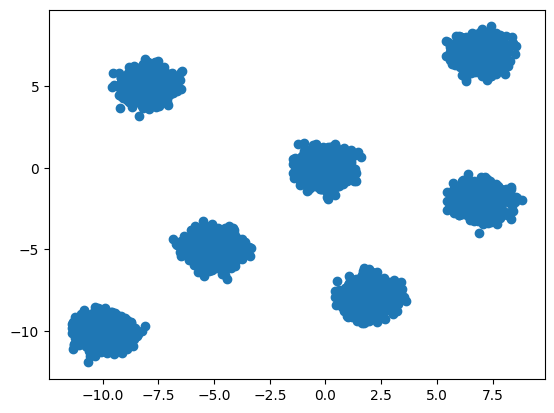

In [23]:
plt.scatter(a[:,0],a[:,1], marker='o')

In [24]:
k_means = KMeans(init="k-means++", n_clusters=7, n_init=21)

In [25]:
k_means.fit(a)

KMeans(n_clusters=7, n_init=21)

BUAT LABLE KE MASING" CLUSTER

In [26]:
k_means_lab = k_means.labels_
k_means_lab

array([6, 5, 4, ..., 5, 1, 1], dtype=int32)

Find centroid from cluster

In [27]:
k_means_cluster_center = k_means.cluster_centers_
k_means_cluster_center

array([[-9.99868042e+00, -1.00187389e+01],
       [ 6.97520494e+00,  7.03044248e+00],
       [ 6.97626494e+00, -1.99594222e+00],
       [-7.97828104e+00,  4.97852119e+00],
       [ 2.00590706e+00, -7.99509153e+00],
       [-3.84700991e-03, -9.69854262e-03],
       [-5.02134749e+00, -4.97735370e+00]])

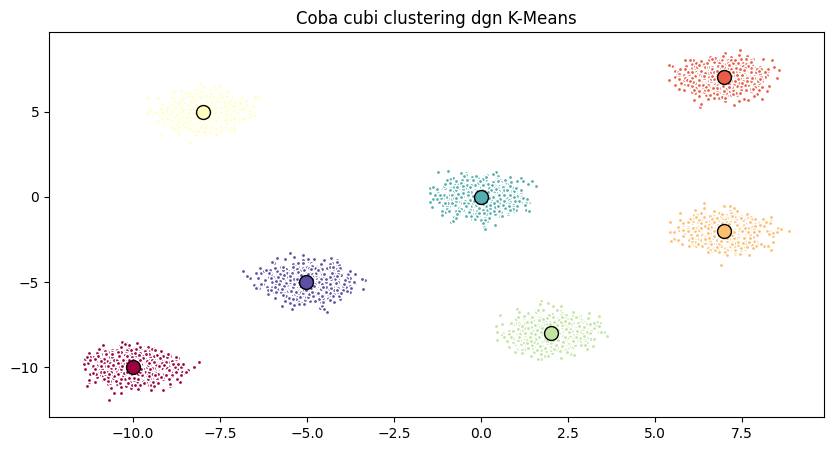

In [28]:
#mari kita buat visualisasinya!
fig = plt.figure(figsize=(10,5))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_lab))))
ax = fig.add_subplot(1, 1, 1)
tengah = centroid
#bikin perulangan utk nampilin data dan centroid-nya per cluster
for k, col in zip(range(len(tengah)), colors):
  members = (k_means_lab == k)

  #ini utk tentukan pusat centroid
  pusat_cluster = k_means_cluster_center[k]

  # #kasi warna utk anggota
  ax.plot(a[members, 0], a[members, 1], 'w', markerfacecolor=col, marker='.')

  #kasi warna utk pusatnya
  ax.plot(pusat_cluster[0], pusat_cluster[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

ax.set_title('Coba cubi clustering dgn K-Means')
# ax.set_xticks(())
# ax.set_yticks(())

#mari berdoa dan tampilkan!
plt.show()



```
# This is formatted as code
```

DATA REAL


In [29]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2024-02-15 09:16:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.09s   

2024-02-15 09:16:03 (365 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [30]:
import pandas as pd

df= pd.read_csv("Cust_Segmentation.csv")
df.head()
# print(df.describe())
# print(df.shape)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [31]:
df_1 = df.drop('Address', axis = 1)
df_1

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [32]:
# find range dari tiap data => jarak dari tiap data
from sklearn.preprocessing import StandardScaler
X = df_1.values[:,1:]
X = np.nan_to_num(X)

cluster_dataset = StandardScaler().fit_transform(X)
a= cluster_dataset.shape
a

(850, 8)

In [33]:
kel_clus = 3
k_means = KMeans(init="k-means++", n_clusters = kel_clus, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [34]:
# chek tiap data berdasarkan kelompok clusternya.
df_1 ["Kelompok Cluster"] = labels
df_1.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Kelompok Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
5,6,40,1,23,81,0.998,7.831,NaN,10.9,1
6,7,38,2,4,56,0.442,0.454,0.0,1.6,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,1
8,9,26,1,5,18,0.575,2.215,NaN,15.5,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,1
